In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [11]:
dataset = pd.read_csv("moonDataset.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)

# Activation functions

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Error functions

In [13]:
def sq_error(target, output):
    return (target - output) ** 2

def der_sq_error(target, output):
    return -2 * (target - output)

In [14]:
# Initialize weights and biases
W1, W2, W3, W4 = 0.2, -0.3, 0.4, 0.1
W5, W6, W7, W8 = -0.5, 0.2, -0.3, -0.2
W9, W10, W11, W12 = 0.85, 0.44, 0.66, 0.18
b1, b2, b3, b4 = -0.4, 0.2, 0.1, 0.9

# Training parameters
learning_rate = -0.01
epochs = 20
losses = []

# Forward pass

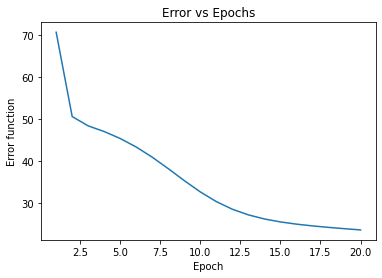

In [15]:
# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X)):
        # Forward pass
        h1_input = X[i][0] * W1 + X[i][1] * W4 + X[i][2] * W7 + b1
        h1_output = sigmoid(h1_input)

        h2_input = X[i][0] * W2 + X[i][1] * W5 + X[i][2] * W8 + b2
        h2_output = sigmoid(h2_input)

        h3_input = X[i][0] * W3 + X[i][1] * W6 + X[i][2] * W9 + b3
        h3_output = sigmoid(h3_input)

        output_layer_input = h1_output * W10 + h2_output * W11 + h3_output * W12 + b4
        output = tanh(output_layer_input)

        # Calculate loss using squared error
        error = sq_error(y[i], output)
        epoch_loss += error

        # Backward pass
        output_delta = der_sq_error(y[i], output) * tanh_derivative(output_layer_input)

        h1_delta = output_delta * W10 * sigmoid_derivative(h1_output)
        h2_delta = output_delta * W11 * sigmoid_derivative(h2_output)
        h3_delta = output_delta * W12 * sigmoid_derivative(h3_output)

        # Update weights and biases
        W10 += learning_rate * output_delta * h1_output
        W11 += learning_rate * output_delta * h2_output
        W12 += learning_rate * output_delta * h3_output
        b4 += learning_rate * output_delta

        W1 += learning_rate * h1_delta * X[i][0]
        W3 += learning_rate * h1_delta * X[i][1]
        W5 += learning_rate * h1_delta * X[i][2]
        b1 += learning_rate * h1_delta

        W2 += learning_rate * h2_delta * X[i][0]
        W4 += learning_rate * h2_delta * X[i][1]
        W6 += learning_rate * h2_delta * X[i][2]
        b2 += learning_rate * h2_delta

        W7 += learning_rate * h3_delta * X[i][0]
        W8 += learning_rate * h3_delta * X[i][1]
        W9 += learning_rate * h3_delta * X[i][2]
        b3 += learning_rate * h3_delta

    # Track loss for the epoch
    losses.append(epoch_loss)

# Plot the loss
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Error function')
plt.title('Error vs Epochs')
plt.show()